###📚 Librairies

In [ ]:
#importation librairies
import pandas as pd
import plotly.express as px


### 👀 Exploration and Cleaning

In [ ]:
#csv dataset loading in data frame
df_products=pd.read_csv('blinkit_products.csv')
df_orders=pd.read_csv('blinkit_orders.csv') #  #delivery status, payment method, order total, store id, partner id //order id, customer id
df_items=pd.read_csv('blinkit_order_items.csv')
df_marketing=pd.read_csv('blinkit_marketing_performance.csv')
df_inventory1=pd.read_csv('blinkit_inventory.csv') #stock received, damaged stock, date// product id
df_inventory2=pd.read_csv('blinkit_inventoryNew.csv')#do not use
df_customers=pd.read_csv('blinkit_customers.csv') #customer info address, avg order, total order, customer segment // customer id
df_feedback=pd.read_csv('blinkit_customer_feedback.csv')
df_delivery=pd.read_csv('blinkit_delivery_performance.csv') #promised and actual time, delivery time minutes, reasons delayed, distance km// order id, delivery partner id
#data catalogue


Info sur 5000 commandes à un temps t1 pour les commandes et un autre temps t2 pour l'inventaire

## 🍏 Products.csv


In [ ]:
df_products.shape #268 lines and 10 columns

(268, 10)

In [ ]:
df_products.sample(5)

product_id product_name              category                  brand  \
146      993331       Pulses     Grocery & Staples  Parmer, Gola and Yogi   
193       63769       Lotion         Personal Care             Dalal-Shan   
150       36412    Dish Soap        Household Care           Muni-Shankar   
98       228286         Cola  Cold Drinks & Juices      Bhattacharyya PLC   
246      706112     Vitamins              Pharmacy   Magar, Gara and Garg   

      price      mrp  margin_percentage  shelf_life_days  min_stock_level  \
146  102.44   120.52               15.0              365               28   
193  878.07  1350.88               35.0              365               27   
150  397.68   530.24               25.0              365               27   
98   179.08   255.83               30.0              180               26   
246  478.79   598.49               20.0              365               12   

     max_stock_level  
146               86  
193               69  
150               92  
98                79  
246               77

In [ ]:
df_products.isnull().sum() #no missing data

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [ ]:
df_products['product_id'].nunique() #KP= product id

268

In [ ]:
#data type OK
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [ ]:
df_products.describe(include = 'all')
#51 product name, 11 category, 267 brands

product_id product_name           category      brand       price  \
count      268.000000          268                268        268  268.000000   
unique            NaN           51                 11        267         NaN   
top               NaN   Pet Treats  Dairy & Breakfast  Jha Group         NaN   
freq              NaN           12                 30          2         NaN   
mean    514855.940299          NaN                NaN        NaN  488.356828   
std     291391.529820          NaN                NaN        NaN  298.487200   
min       4452.000000          NaN                NaN        NaN   12.320000   
25%     273697.750000          NaN                NaN        NaN  226.717500   
50%     541459.000000          NaN                NaN        NaN  442.185000   
75%     754334.000000          NaN                NaN        NaN  779.445000   
max     993331.000000          NaN                NaN        NaN  995.980000   

                mrp  margin_percentage  shelf_life_days  min_stock_level  \
count    268.000000         268.000000       268.000000       268.000000   
unique          NaN                NaN              NaN              NaN   
top             NaN                NaN              NaN              NaN   
freq            NaN                NaN              NaN              NaN   
mean     680.434739          27.779851       231.757463        20.388060   
std      419.772224           7.458753       151.205830         5.958546   
min       17.600000          15.000000         3.000000        10.000000   
25%      325.150000          20.000000        90.000000        15.000000   
50%      616.970000          30.000000       365.000000        21.000000   
75%     1056.620000          35.000000       365.000000        25.250000   
max     1633.320000          40.000000       365.000000        30.000000   

        max_stock_level  
count        268.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean          74.753731  
std           14.591535  
min           50.000000  
25%           63.750000  
50%           73.000000  
75%           88.000000  
max          100.000000

In [ ]:
#qualitatitve data
for col in df_products.select_dtypes(exclude = 'number'):
  print(df_products[col].value_counts())
  #1 brand per product
  #some category have more different choices and product name

product_name
Pet Treats           12
Toilet Cleaner       10
Dish Soap            10
Lotion               10
Vitamins             10
Cough Syrup           9
Pulses                8
Baby Wipes            8
Frozen Biryani        7
Orange Juice          7
Detergent             7
Biscuits              7
Potatoes              7
Bread                 7
Cat Food              7
Cola                  7
Eggs                  7
Baby Food             6
Onions                6
Pain Reliever         6
Dog Food              6
Soap                  5
Frozen Pizza          5
Shampoo               5
Toothpaste            5
Sugar                 5
Wheat Flour           5
Carrots               5
Cheese                5
Popcorn               5
Chips                 4
Curd                  4
Butter                4
Chocolates            4
Nuts                  4
Mango Drink           4
Ice Cream             3
Salt                  3
Iced Tea              3
Cookies               3
Bananas               3
Tom

In [ ]:
import plotly.express as px
for col in df_products.select_dtypes(exclude = 'number'):
  fig = px.bar(df_products[col])
  fig.show()

In [ ]:
df_products.describe()
#check shelf life days mean élevé et important sd
# min et max stock TB mais voir surstockage
#cout par produit de stockage improtant + sd aussi, voir rentabilité par categ et product name

#cout stockage, surstockage, stock dormant, évolution temps

product_id       price          mrp  margin_percentage  \
count     268.000000  268.000000   268.000000         268.000000   
mean   514855.940299  488.356828   680.434739          27.779851   
std    291391.529820  298.487200   419.772224           7.458753   
min      4452.000000   12.320000    17.600000          15.000000   
25%    273697.750000  226.717500   325.150000          20.000000   
50%    541459.000000  442.185000   616.970000          30.000000   
75%    754334.000000  779.445000  1056.620000          35.000000   
max    993331.000000  995.980000  1633.320000          40.000000   

       shelf_life_days  min_stock_level  max_stock_level  
count       268.000000       268.000000       268.000000  
mean        231.757463        20.388060        74.753731  
std         151.205830         5.958546        14.591535  
min           3.000000        10.000000        50.000000  
25%          90.000000        15.000000        63.750000  
50%         365.000000        21.000000        73.000000  
75%         365.000000        25.250000        88.000000  
max         365.000000        30.000000       100.000000

In [ ]:
import plotly.express as px
for col in df_products.select_dtypes(include = 'number'):
  fig2 = px.box(df_products[col])
  fig2.show() #should check shelf life days due to data repartition

## 👜 Orders csv

In [ ]:
df_orders.head() #delivery status, payment method, order total, store id, partner id //order id, customer id

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [ ]:
df_orders.nunique() #2.172 customers #5000 orders

order_id                  5000
customer_id               2172
order_date                5000
promised_delivery_time    4999
actual_delivery_time      5000
delivery_status              3
order_total               4550
payment_method               4
delivery_partner_id       5000
store_id                  5000
dtype: int64

In [ ]:
#date format
df_orders['promised_delivery_time'] = pd.to_datetime(df_orders['promised_delivery_time'])
df_orders['actual_delivery_time'] = pd.to_datetime(df_orders['actual_delivery_time'])

average_diff_minutes = (df_orders['promised_delivery_time'] - df_orders['actual_delivery_time']).dt.total_seconds().mean() / 60
average_diff_minutes

np.float64(-4.443)

In [ ]:
df_orders.info()#date OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   object        
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 390.8+ KB


In [ ]:
df_orders.isnull().sum() #no missing data

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64

In [ ]:
#PK
df_orders['order_id'].is_unique # true KP
df_orders['order_id'].count() #5.000
df_orders['delivery_partner_id'].is_unique # true
df_orders['delivery_partner_id'].nunique() #5.000

5000

In [ ]:
#qualitatitve data
for col in df_orders.select_dtypes(exclude = 'number'):
  print(df_orders[col].value_counts())

order_date
2023-08-23 12:04:18    1
2024-07-17 08:34:01    1
2024-05-28 13:14:29    1
2024-09-23 13:07:12    1
2023-11-24 16:16:56    1
                      ..
2023-10-22 11:15:33    1
2023-04-25 20:32:24    1
2023-08-30 19:37:06    1
2023-08-09 01:17:30    1
2023-07-13 23:49:36    1
Name: count, Length: 5000, dtype: int64
promised_delivery_time
2024-10-13 14:06:50    2
2024-03-16 09:38:08    1
2023-11-04 22:32:56    1
2023-08-17 13:35:57    1
2024-04-05 00:35:49    1
                      ..
2023-04-18 12:32:04    1
2023-10-12 12:10:11    1
2023-08-07 07:56:06    1
2023-04-09 04:34:53    1
2023-09-06 03:20:59    1
Name: count, Length: 4999, dtype: int64
actual_delivery_time
2023-08-23 12:21:18    1
2024-07-17 08:47:01    1
2024-05-28 13:27:29    1
2024-09-23 13:29:12    1
2023-11-24 16:33:56    1
                      ..
2023-10-22 11:37:33    1
2023-04-25 20:39:24    1
2023-08-30 19:45:06    1
2023-08-09 01:44:30    1
2023-07-14 00:05:36    1
Name: count, Length: 5000, dtype: int64


In [ ]:
df_orders.describe()
df_orders['delivery_partner_id'].nunique() #5.000 delivery partner and 5.000 store id

5000

In [ ]:
df_orders['payment_method'].nunique()

4

In [ ]:
df_orders['delivery_partner_id'].nunique()

5000

In [ ]:
df_orders['order_id'].nunique()

5000

## ✈ Delivery csv

In [ ]:
df_delivery.head()

order_id  delivery_partner_id        promised_time          actual_time  \
0  1961864118                63230  2024-07-17 08:52:01  2024-07-17 08:47:01   
1  1549769649                14983  2024-05-28 13:25:29  2024-05-28 13:27:29   
2  9185164487                39859  2024-09-23 13:25:12  2024-09-23 13:29:12   
3  9644738826                61497  2023-11-24 16:34:56  2023-11-24 16:33:56   
4  5427684290                84315  2023-11-20 05:17:39  2023-11-20 05:18:39   

   delivery_time_minutes  distance_km delivery_status reasons_if_delayed  
0                   -5.0         0.96         On Time                NaN  
1                    2.0         0.98         On Time            Traffic  
2                    4.0         3.83         On Time            Traffic  
3                   -1.0         2.76         On Time                NaN  
4                    1.0         2.63         On Time            Traffic

In [ ]:
df_delivery.isnull().sum() #1902 reasons missing

order_id                    0
delivery_partner_id         0
promised_time               0
actual_time                 0
delivery_time_minutes       0
distance_km                 0
delivery_status             0
reasons_if_delayed       1902
dtype: int64

In [ ]:
df_delivery['reasons_if_delayed'].fillna('Unknown', inplace=True)

<ipython-input-26-08ff7c2d31d7>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
missing_reasons=df_delivery['reasons_if_delayed'].isna().mean() * 100
missing_reasons #38% missing


np.float64(0.0)

In [ ]:
df_delivery['order_id'].nunique()

5000

In [ ]:
df_delivery['delivery_partner_id'].nunique()

5000

In [ ]:
df_delivery['promised_time'] = pd.to_datetime(df_delivery['promised_time'])
df_delivery['actual_time'] = pd.to_datetime(df_delivery['actual_time'])
df_delivery.info() #date OK

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
df_delivery.shape #5.000 lines and 8 columns
df_delivery.info() #promised time and delivery time minutes in object
df_delivery.isnull().sum()#missing data reasons if delayed , top traffic
df_delivery.describe(include='all') #1 unique data for reason : traffic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 312.6+ KB


order_id  delivery_partner_id                  promised_time  \
count   5.000000e+03          5000.000000                           5000   
unique           NaN                  NaN                            NaN   
top              NaN                  NaN                            NaN   
freq             NaN                  NaN                            NaN   
mean    5.029129e+09         50050.318200  2024-01-09 00:51:05.743200256   
min     6.046500e+04            43.000000            2023-03-16 08:27:44   
25%     2.531421e+09         24928.500000  2023-08-17 02:13:24.249999872   
50%     5.074378e+09         50262.500000            2024-01-07 11:47:02   
75%     7.488579e+09         74478.250000  2024-06-03 21:09:30.750000128   
max     9.998298e+09         99968.000000            2024-11-04 20:43:15   
std     2.863533e+09         28802.276922                            NaN   

                          actual_time  delivery_time_minutes  distance_km  \
count                            5000            5000.000000  5000.000000   
unique                            NaN                    NaN          NaN   
top                               NaN                    NaN          NaN   
freq                              NaN                    NaN          NaN   
mean       2024-01-09 00:55:32.323200               4.443000     2.718048   
min               2023-03-16 08:24:44              -5.000000     0.500000   
25%     2023-08-17 02:27:24.249999872              -1.000000     1.590000   
50%               2024-01-07 11:51:02               2.000000     2.690000   
75%     2024-06-03 21:09:30.750000128               8.000000     3.850000   
max               2024-11-04 20:47:15              30.000000     5.000000   
std                               NaN               8.063929     1.290306   

       delivery_status reasons_if_delayed  
count             5000               5000  
unique               3                  2  
top            On Time            Traffic  
freq              3470               3098  
mean               NaN                NaN  
min                NaN                NaN  
25%                NaN                NaN  
50%                NaN                NaN  
75%                NaN                NaN  
max                NaN                NaN  
std                NaN                NaN

In [ ]:
import plotly.express as px
for col in df_delivery.select_dtypes(include = 'number'):
  fig = px.box(df_delivery[col])
  fig.show()
  #delivery time minutes to check

In [ ]:
import plotly.express as px
for col in df_delivery.select_dtypes(exclude = 'number'):
  fig = px.box(df_delivery[col])
  fig.show()

In [ ]:
df_delivery.head()

order_id  delivery_partner_id       promised_time         actual_time  \
0  1961864118                63230 2024-07-17 08:52:01 2024-07-17 08:47:01   
1  1549769649                14983 2024-05-28 13:25:29 2024-05-28 13:27:29   
2  9185164487                39859 2024-09-23 13:25:12 2024-09-23 13:29:12   
3  9644738826                61497 2023-11-24 16:34:56 2023-11-24 16:33:56   
4  5427684290                84315 2023-11-20 05:17:39 2023-11-20 05:18:39   

   delivery_time_minutes  distance_km delivery_status reasons_if_delayed  
0                   -5.0         0.96         On Time            Unknown  
1                    2.0         0.98         On Time            Traffic  
2                    4.0         3.83         On Time            Traffic  
3                   -1.0         2.76         On Time            Unknown  
4                    1.0         2.63         On Time            Traffic

## 🧑 Customers

In [ ]:
df_customers.columns


Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [ ]:
df_customers.shape #2500 lignes 11 colonnes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [ ]:
df_customers.head()

customer_id  customer_name                     email         phone  \
0     97475543  Niharika Nagi    ektataneja@example.org  912987579691   
1     22077605   Megha Sachar      vedant45@example.com  915123179717   
2     47822591     Hema Bahri     samiazaan@example.com  910034076149   
3     79726146     Zaitra Vig     ishanvi87@example.org  916264232390   
4     57102800   Januja Verma  atideshpande@example.org  917293526596   

                               address          area  pincode  \
0  23, Nayar Path, Bihar Sharif-154625         Udupi   321865   
1  51/302, Buch Chowk\nSrinagar-570271       Aligarh   149394   
2   941\nAnne Street, Darbhanga 186125     Begusarai   621411   
3       43/94, Ghosh, Alappuzha 635655     Kozhikode   826054   
4             06\nOm, Ambarnath 477463  Ichalkaranji   730539   

  registration_date customer_segment  total_orders  avg_order_value  
0        2023-05-13          Premium            13           451.92  
1        2024-06-18         Inactive             4           825.48  
2        2024-09-25          Regular            17          1969.81  
3        2023-10-04              New             4           220.09  
4        2024-03-22         Inactive            14           578.14

In [ ]:
df_customers.isnull().sum() #no missing data

customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64

In [ ]:
df_customers['customer_id'].nunique()

2500

In [ ]:
df_orders['customer_id'].nunique() # 87% de mes clients ont fait commande, échantillon de 5.000 orders

2172

In [ ]:
df_customers.head() #customer info address, avg order, total order, customer segment // customer id
#customer behavior
df_customers.describe()
df_customers['customer_id'].value_counts().sum() #2.500 customers
df_customers['area'].value_counts().sort_values(ascending=False) #surtout Jalna, Deoghar, Bathinda
df_customers['registration_date'].min() #2023.03.16
df_customers['registration_date'].max() #2024.11.04 # mars 2023 novembre 2024 1an1/2

'2024-11-04'

## 📖 Inventory csv

In [ ]:
df_inventory2.head()

product_id    date  stock_received  damaged_stock
0      153019  Mar-23               4              1
1      848226  Mar-23               4              1
2      965755  Mar-23               1              0
3       39154  Mar-23               4              0
4       34186  Mar-23               3              1

In [ ]:
df_inventory1.head()

product_id        date  stock_received  damaged_stock
0      153019  17-03-2023               4              2
1      848226  17-03-2023               4              2
2      965755  17-03-2023               1              0
3       39154  17-03-2023               4              0
4       34186  17-03-2023               3              2

In [ ]:
df_inventory2[df_inventory2['product_id'] == 673058]

product_id    date  stock_received  damaged_stock
146        673058  Mar-23               3              0
477        673058  Mar-23               1              0
722        673058  Mar-23               2              0
930        673058  Apr-23               1              0
993        673058  Apr-23               1              0
...           ...     ...             ...            ...
17169      673058  Oct-24               3              0
17279      673058  Oct-24               1              0
17405      673058  Oct-24               3              0
17893      673058  Nov-24               1              0
18103      673058  Nov-24               3              0

[69 rows x 4 columns]

In [ ]:
df_inventory1[df_inventory1['product_id'] == 673058]

product_id        date  stock_received  damaged_stock
237        673058  18-03-2023               3              0
492        673058  20-03-2023               0              2
744        673058  22-03-2023               3              0
1031       673058  24-03-2023               3              2
1396       673058  27-03-2023               0              2
...           ...         ...             ...            ...
74537      673058  31-10-2024               4              0
74673      673058  01-11-2024               4              0
74800      673058  02-11-2024               0              2
75060      673058  04-11-2024               4              0
75170      673058  05-11-2024               3              2

[303 rows x 4 columns]

In [ ]:
df_inventory1

product_id        date  stock_received  damaged_stock
0          153019  17-03-2023               4              2
1          848226  17-03-2023               4              2
2          965755  17-03-2023               1              0
3           39154  17-03-2023               4              0
4           34186  17-03-2023               3              2
...           ...         ...             ...            ...
75167      298985  05-11-2024               3              0
75168      679284  05-11-2024               3              0
75169      240179  05-11-2024               3              0
75170      673058  05-11-2024               3              2
75171      114414  05-11-2024               3              0

[75172 rows x 4 columns]

In [ ]:
#transformer la date en format date inventory 1


In [ ]:
df_inventory2.isnull().sum() #no data missing
df_inventory2.shape #18 105 lignes pour  268 produits, 21 dates
df_inventory2.nunique()
#doublons de product id need to be aggregated on product it
df_inventory2.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')

In [ ]:
df_inventory2.shape


(18105, 4)

In [ ]:
df_inventory1['date'] = pd.to_datetime(df_inventory1['date'])

<ipython-input-50-5b93d31ff3dc>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
df_inventory1.shape #75172 lignes
df_inventory1.nunique() #268 product id

product_id        268
date              600
stock_received      4
damaged_stock       2
dtype: int64

In [ ]:
import plotly.express as px
for col in df_inventory2.select_dtypes(include = 'number'):
  fig = px.box(df_inventory2[col])
  fig.show()

In [ ]:
df_inventory1['date'].value_counts()

date
2023-06-04    150
2023-12-22    149
2023-03-24    149
2023-06-15    147
2024-10-04    147
             ... 
2023-11-14    104
2023-10-21    104
2024-01-11    104
2023-06-22    102
2024-07-20     99
Name: count, Length: 600, dtype: int64

In [ ]:
df_inventory2['date'].value_counts()
df_inventory2['date'].max() #mars 2023
df_inventory2['date'].min() #april 2023

df_inventory1['date'].max() #05.11.2024
df_inventory1['date'].min() #17.03.2023


Timestamp('2023-03-17 00:00:00')

In [ ]:
df_inventory1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_id      75172 non-null  int64         
 1   date            75172 non-null  datetime64[ns]
 2   stock_received  75172 non-null  int64         
 3   damaged_stock   75172 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 MB


In [ ]:
#invetory: bcp de stock damaged: quels produits sont damanged ? Y a t'il une categorie de produits + damanged que d'autres, comprendre pourquoi.

In [ ]:
dfm_invent1_product = df_inventory1.merge(df_products, how = "inner", on = 'product_id')

In [ ]:
dfm_invent1_product.head() #nom et categ produits damaged

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   
2      965755 2023-03-17               1              0      Bananas   
3       39154 2023-03-17               4              0      Mangoes   
4       34186 2023-03-17               3              2      Mangoes   

              category                   brand   price      mrp  \
0  Fruits & Vegetables              Aurora LLC  947.95  1263.93   
1  Fruits & Vegetables          Barad and Sons  209.59   279.45   
2  Fruits & Vegetables  Doshi, Sarraf and Sama  532.57   710.09   
3  Fruits & Vegetables  Suresh, Bose and Bajwa  946.86  1262.48   
4  Fruits & Vegetables              Mandal-Kar  925.65  1234.20   

   margin_percentage  shelf_life_days  min_stock_level  max_stock_level  
0               25.0                3               13               88  
1               25.0                3               10               51  
2               25.0                3               21               91  
3               25.0                3               21               84  
4               25.0                3               27               74

## 🍂 Customers feedbacks

In [ ]:
df_feedback.shape #5000 lignes
df_feedback.nunique() #5000 feedback id and order id 2172 customer id w feedback dates
#voir si order id meme que orders et delivery
#voir si customer id meme que orders et delivery
df_feedback.head()
df_feedback.info() # feedback date
df_feedback['df_feedback'] = pd.to_datetime(df_feedback['feedback_date'])
#date format
df_feedback.isnull().sum() #no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
df_feedback          0
dtype: int64

## 🍊 Items csv

In [ ]:
df_items['product_id'].nunique()

268

In [ ]:
df_items.describe() #order id, product id, quantity, unit price

order_id     product_id     quantity   unit_price
count  5.000000e+03    5000.000000  5000.000000  5000.000000
mean   5.029129e+09  509974.939600     2.006800   493.157900
std    2.863533e+09  293678.307475     0.820542   298.075647
min    6.046500e+04    4452.000000     1.000000    12.320000
25%    2.531421e+09  257719.000000     1.000000   227.220000
50%    5.074378e+09  540618.000000     2.000000   448.160000
75%    7.488579e+09  747801.000000     3.000000   781.080000
max    9.998298e+09  993331.000000     3.000000   995.980000

In [ ]:
df_items.shape # 5.000 lines 4 columns
df_items.info() #data OK
df_items.isnull().sum() #no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64

In [ ]:
import plotly.express as px
for col in df_items.select_dtypes(include = 'number'):
  fig = px.box(df_items[col])
  fig.show()

## 🔗 Merge data

# 🏤 Stock

## Damaged products

We need to merge products and inventory1 to understand wich product name and category are damaged

In [ ]:
df_inventory1.head() #date and damaged stock versus stock received w product id
df_inventory1.shape #75175 lignes
df_inventory1.nunique() # no PK

product_id        268
date              600
stock_received      4
damaged_stock       2
dtype: int64

In [ ]:
df_products.head() # max stock, min stock per product id w product name

product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           Barad and Sons   
4      890623       Onions  Fruits & Vegetables  Sangha, Nagar and Varty   

    price      mrp  margin_percentage  shelf_life_days  min_stock_level  \
0  947.95  1263.93               25.0                3               13   
1  127.16   169.55               25.0                3               20   
2  212.14   282.85               25.0                3               23   
3  209.59   279.45               25.0                3               10   
4  354.52   472.69               25.0                3               27   

   max_stock_level  
0               88  
1               65  
2               70  
3               51  
4               55

In [ ]:
df_products.nunique() #268 products id
df_products.shape #268 lignes

(268, 10)

In [ ]:
df_inventory1

product_id       date  stock_received  damaged_stock
0          153019 2023-03-17               4              2
1          848226 2023-03-17               4              2
2          965755 2023-03-17               1              0
3           39154 2023-03-17               4              0
4           34186 2023-03-17               3              2
...           ...        ...             ...            ...
75167      298985 2024-11-05               3              0
75168      679284 2024-11-05               3              0
75169      240179 2024-11-05               3              0
75170      673058 2024-11-05               3              2
75171      114414 2024-11-05               3              0

[75172 rows x 4 columns]

In [ ]:
dfm_invent1_product = df_inventory1.merge(df_products, how = "inner", on = 'product_id')
dfm_invent1_product.nunique() #268 product id, 600 dates differents
dfm_invent1_product.shape

(75172, 13)

In [ ]:
dfm_invent1_product.head()

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   
2      965755 2023-03-17               1              0      Bananas   
3       39154 2023-03-17               4              0      Mangoes   
4       34186 2023-03-17               3              2      Mangoes   

              category                   brand   price      mrp  \
0  Fruits & Vegetables              Aurora LLC  947.95  1263.93   
1  Fruits & Vegetables          Barad and Sons  209.59   279.45   
2  Fruits & Vegetables  Doshi, Sarraf and Sama  532.57   710.09   
3  Fruits & Vegetables  Suresh, Bose and Bajwa  946.86  1262.48   
4  Fruits & Vegetables              Mandal-Kar  925.65  1234.20   

   margin_percentage  shelf_life_days  min_stock_level  max_stock_level  
0               25.0                3               13               88  
1               25.0                3               10               51  
2               25.0                3               21               91  
3               25.0                3               21               84  
4               25.0                3               27               74

In [ ]:
dfm_invent1_product.shape #75172 lignes


(75172, 13)

In [ ]:
dfm_invent1_product.head()


product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   
2      965755 2023-03-17               1              0      Bananas   
3       39154 2023-03-17               4              0      Mangoes   
4       34186 2023-03-17               3              2      Mangoes   

              category                   brand   price      mrp  \
0  Fruits & Vegetables              Aurora LLC  947.95  1263.93   
1  Fruits & Vegetables          Barad and Sons  209.59   279.45   
2  Fruits & Vegetables  Doshi, Sarraf and Sama  532.57   710.09   
3  Fruits & Vegetables  Suresh, Bose and Bajwa  946.86  1262.48   
4  Fruits & Vegetables              Mandal-Kar  925.65  1234.20   

   margin_percentage  shelf_life_days  min_stock_level  max_stock_level  
0               25.0                3               13               88  
1               25.0                3               10               51  
2               25.0                3               21               91  
3               25.0                3               21               84  
4               25.0                3               27               74

In [ ]:
dfm_invent1_product.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level'],
      dtype='object')

In [ ]:
#cout des produits vendus
#produits en rupture :il me faut les ventes
#total produits vendus
#CA
#cout de stockage par produit

In [ ]:
# Pourcentage de stock endommagé
((dfm_invent1_product['damaged_stock'] / dfm_invent1_product['stock_received'])*100).round(2)
dfm_invent1_product['damaged_percentage']=((dfm_invent1_product['damaged_stock'] / dfm_invent1_product['stock_received'])*100).round(2)
dfm_invent1_product.head()

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   
2      965755 2023-03-17               1              0      Bananas   
3       39154 2023-03-17               4              0      Mangoes   
4       34186 2023-03-17               3              2      Mangoes   

              category                   brand   price      mrp  \
0  Fruits & Vegetables              Aurora LLC  947.95  1263.93   
1  Fruits & Vegetables          Barad and Sons  209.59   279.45   
2  Fruits & Vegetables  Doshi, Sarraf and Sama  532.57   710.09   
3  Fruits & Vegetables  Suresh, Bose and Bajwa  946.86  1262.48   
4  Fruits & Vegetables              Mandal-Kar  925.65  1234.20   

   margin_percentage  shelf_life_days  min_stock_level  max_stock_level  \
0               25.0                3               13               88   
1               25.0                3               10               51   
2               25.0                3               21               91   
3               25.0                3               21               84   
4               25.0                3               27               74   

   damaged_percentage  
0               50.00  
1               50.00  
2                0.00  
3                0.00  
4               66.67

In [ ]:
# Calcul du stock disponible par produit (stock_received - damaged_stock)
dfm_invent1_product['stock_received'] - dfm_invent1_product['damaged_stock']
#((dfm_invent1_product['stock_received'] - dfm_invent1_product['damaged_stock']) / dfm_invent1_product['stock_received'] * 100).round(2)
#je ne sais pas si le % a un intéret en fait
dfm_invent1_product['available_stock'] = dfm_invent1_product['stock_received'] - dfm_invent1_product['damaged_stock']
#par contre il me manque les ventes
dfm_invent1_product['available_stock']

0        2
1        2
2        1
3        4
4        1
        ..
75167    3
75168    3
75169    3
75170    1
75171    3
Name: available_stock, Length: 75172, dtype: int64

In [ ]:
dfm_invent1_product.head(2)

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   

              category           brand   price      mrp  margin_percentage  \
0  Fruits & Vegetables      Aurora LLC  947.95  1263.93               25.0   
1  Fruits & Vegetables  Barad and Sons  209.59   279.45               25.0   

   shelf_life_days  min_stock_level  max_stock_level  damaged_percentage  \
0                3               13               88                50.0   
1                3               10               51                50.0   

   available_stock  
0                2  
1                2

In [ ]:
dfm_invent1_product.groupby(['product_id', 'date']).size().value_counts()

1    75172
Name: count, dtype: int64

In [ ]:
dfm_invent1_product

product_id       date  stock_received  damaged_stock product_name  \
0          153019 2023-03-17               4              2       Onions   
1          848226 2023-03-17               4              2     Tomatoes   
2          965755 2023-03-17               1              0      Bananas   
3           39154 2023-03-17               4              0      Mangoes   
4           34186 2023-03-17               3              2      Mangoes   
...           ...        ...             ...            ...          ...   
75167      298985 2024-11-05               3              0     Vitamins   
75168      679284 2024-11-05               3              0  Cough Syrup   
75169      240179 2024-11-05               3              0  Cough Syrup   
75170      673058 2024-11-05               3              2  Cough Syrup   
75171      114414 2024-11-05               3              0     Vitamins   

                  category                             brand   price      mrp  \
0      Fruits & Vegetables                        Aurora LLC  947.95  1263.93   
1      Fruits & Vegetables                    Barad and Sons  209.59   279.45   
2      Fruits & Vegetables            Doshi, Sarraf and Sama  532.57   710.09   
3      Fruits & Vegetables            Suresh, Bose and Bajwa  946.86  1262.48   
4      Fruits & Vegetables                        Mandal-Kar  925.65  1234.20   
...                    ...                               ...     ...      ...   
75167             Pharmacy  Ramanathan, Joshi and Srinivasan  183.76   229.70   
75168             Pharmacy                          Pant LLC  877.89  1097.36   
75169             Pharmacy                          Ram-Suri   90.56   113.20   
75170             Pharmacy                       Balan-Madan  765.76   957.20   
75171             Pharmacy                        Kara-Golla  832.06  1040.07   

       margin_percentage  shelf_life_days  min_stock_level  max_stock_level  \
0                   25.0                3               13               88   
1                   25.0                3               10               51   
2                   25.0                3               21               91   
3                   25.0                3               21               84   
4                   25.0                3               27               74   
...                  ...              ...              ...              ...   
75167               20.0              365               11               61   
75168               20.0              365               28               95   
75169               20.0              365               20               56   
75170               20.0              365               30               94   
75171               20.0              365               26               66   

       damaged_percentage  available_stock  
0                   50.00                2  
1                   50.00                2  
2                    0.00                1  
3                    0.00                4  
4                   66.67                1  
...                   ...              ...  
75167                0.00                3  
75168                0.00                3  
75169                0.00                3  
75170               66.67                1  
75171                0.00                3  

[75172 rows x 15 columns]

In [ ]:
#df_orders['date_correct'] = pd.to_datetime(df_orders['order_date'].str[:10])
#dfm_invent1_product['date_correct'] = pd.to_datetime(dfm_invent1_product['date'], dayfirst=True)

In [ ]:
#dfm_item_orders = df_items.merge(df_orders[['order_id', 'customer_id', 'date_correct', 'order_total']], on = 'order_id', how = 'left')
#dfm_it_or_gb = dfm_item_orders.groupby(['product_id', 'date_correct'], as_index = False).agg({'order_id':['count'], 'quantity':['sum'], 'order_total':['sum'], 'unit_price': 'mean'})
#dfm_it_or_gb.columns = ['product_id', 'date_correct', 'nb_orders', 'total_qty', 'order_total', 'unit_price']
#dfm_it_or_gb['pk'] = dfm_it_or_gb['product_id'].astype(str)+dfm_it_or_gb['date_correct'].astype(str)
#dfm_invent1_product['pk']= dfm_invent1_product['product_id'].astype(str) + dfm_invent1_product['date_correct'].astype(str)


In [ ]:
#dfm_it_or_gb[['product_id', 'date_correct']].sort_values(by=['product_id', 'date_correct'])

In [ ]:
#dfm_invent1_product[(dfm_invent1_product['date_correct'] =='2023-04-01') & (dfm_invent1_product['product_id'] ==4452)]

In [ ]:
#dfm_invent1_product[['product_id', 'date_correct']].sort_values(by=['product_id', 'date_correct'])

In [ ]:
#dfm_invent1_product.merge(dfm_it_or_gb[['nb_orders', 'total_qty', 'order_total', 'unit_price', 'pk']], on = 'pk', how='left')

In [ ]:
#dfm_it_or_gb = dfm_item_orders.groupby(['product_id', 'order_date_date'], as_index = False).agg({'order_id':['count'], 'quantity':['sum'], 'order_total':['sum'], 'unit_price': 'mean'})

In [ ]:
#dfm_it_or_gb.columns = ['product_id', 'date', 'nb_orders', 'total_qty', 'order_total', 'unit_price']

In [ ]:
#dfm_it_or_gb.groupby(['product_id','order_date']).size().sort_values()

In [ ]:
#dfm_item_orders.groupby(['product_id', 'order_date_date']).size().sort_values()
#il va falloir grouper par produit sans les dates

In [ ]:
dfm_invent1_product.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level',
       'damaged_percentage', 'available_stock'],
      dtype='object')

In [ ]:
#calculer le stock moyen par produit
(dfm_invent1_product['max_stock_level'] + dfm_invent1_product['min_stock_level']) / 2
dfm_invent1_product['average_stock_per_product']=(dfm_invent1_product['max_stock_level'] + dfm_invent1_product['min_stock_level']) / 2
dfm_invent1_product['average_stock_per_product'].mean() #47 produits en moyenne


np.float64(47.54926036290108)

Stock turnover rate

In [ ]:
#stock turnover OK
dfm_invent1_product['stock_received'] / dfm_invent1_product['average_stock_per_product'].round(2)
dfm_invent1_product['stock_turnover_rate'] = (
dfm_invent1_product['stock_received'] / dfm_invent1_product['average_stock_per_product']
).round(2)
#📌 Un taux élevé indique une bonne rotation.
#📌 Un taux faible indique un stock dormant.

% Mrp / price

In [ ]:
((dfm_invent1_product['mrp'] - dfm_invent1_product['price']) / dfm_invent1_product['mrp'] * 100
).round(2)
dfm_invent1_product['pourcentage_mrp_price'] = ((dfm_invent1_product['mrp'] - dfm_invent1_product['price']) / dfm_invent1_product['mrp'] * 100
).round(2)

#📌 Un taux élevé peut indiquer une stratégie agressive de prix ou des problèmes d'écoulement.

Gross margin %

In [ ]:
(dfm_invent1_product['price'] * dfm_invent1_product['margin_percentage'] / 100).round(2)
dfm_invent1_product['gross_margin_per_product'] = (
    dfm_invent1_product['price'] * dfm_invent1_product['margin_percentage'] / 100
).round(2)
#📌 Indicateur clé pour voir quels produits sont les plus rentables.

In [ ]:
df_orders.head() #j'aurais bien voulu l'order id + order date
df_items.head() #j'aurais bien voulu l'order id + order date + quantity sold

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55

J'ai besoin des ventes réelles des produits pour calculer plus de KPI comme le taux de rupture de stock, mais il n'y a pas d'intéret à merger inventory et orders car les dates ne sont pas les memes

Stock rate

In [ ]:
# availability stock rate
dfm_invent1_product['stock_rate']=(dfm_invent1_product['available_stock'] / dfm_invent1_product['max_stock_level'].round(2))
#📌 Si le taux est proche de 1 (100%), le stock est bien rempli.
#📌 Si proche de 0, risque de rupture de stock.

In [ ]:
dfm_invent1_product.head(2)

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   

              category           brand   price      mrp  margin_percentage  \
0  Fruits & Vegetables      Aurora LLC  947.95  1263.93               25.0   
1  Fruits & Vegetables  Barad and Sons  209.59   279.45               25.0   

   shelf_life_days  min_stock_level  max_stock_level  damaged_percentage  \
0                3               13               88                50.0   
1                3               10               51                50.0   

   available_stock  average_stock_per_product  stock_turnover_rate  \
0                2                       50.5                 0.08   
1                2                       30.5                 0.13   

   pourcentage_mrp_price  gross_margin_per_product  stock_rate  
0                   25.0                    236.99    0.022727  
1                   25.0                     52.40    0.039216

In [ ]:
df_items.head()

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55

In [ ]:
dfm_invent1_product.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level',
       'damaged_percentage', 'available_stock', 'average_stock_per_product',
       'stock_turnover_rate', 'pourcentage_mrp_price',
       'gross_margin_per_product', 'stock_rate'],
      dtype='object')

In [ ]:
dfm_invent1_product.nunique() #268 product id
dfm_invent1_product.shape #75172

(75172, 20)

In [ ]:
df_items.head() #quantity, unit price and product id

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55

In [ ]:
df_items.shape#5000 orders id sur 5000 lignes and 268 product id

(5000, 4)

In [ ]:
df_orders.head() #order id and order date

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [ ]:
df_orders.head() #order date, order id

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [ ]:
#taux rupture de stock
(dfm_invent1_product['available_stock'] < dfm_invent1_product['min_stock_level']).astype(int)
#📌 Permet d’identifier les articles fréquemment en rupture.


0        1
1        1
2        1
3        1
4        1
        ..
75167    1
75168    1
75169    1
75170    1
75171    1
Length: 75172, dtype: int64

Ajout de la notion du temps

In [ ]:
#stock endommagé au cours du temps ?#ajout de la notion du temps
dfm_invent1_product['year'] = dfm_invent1_product['date'].dt.year
dfm_invent1_product['month'] = dfm_invent1_product['date'].dt.month
dfm_invent1_product['week'] = dfm_invent1_product['date'].dt.isocalendar().week
dfm_invent1_product['day'] = dfm_invent1_product['date'].dt.day

In [ ]:
dfm_invent1_product.head(2)

product_id       date  stock_received  damaged_stock product_name  \
0      153019 2023-03-17               4              2       Onions   
1      848226 2023-03-17               4              2     Tomatoes   

              category           brand   price      mrp  margin_percentage  \
0  Fruits & Vegetables      Aurora LLC  947.95  1263.93               25.0   
1  Fruits & Vegetables  Barad and Sons  209.59   279.45               25.0   

   ...  available_stock  average_stock_per_product  stock_turnover_rate  \
0  ...                2                       50.5                 0.08   
1  ...                2                       30.5                 0.13   

   pourcentage_mrp_price  gross_margin_per_product  stock_rate  year  month  \
0                   25.0                    236.99    0.022727  2023      3   
1                   25.0                     52.40    0.039216  2023      3   

   week  day  
0    11   17  
1    11   17  

[2 rows x 24 columns]

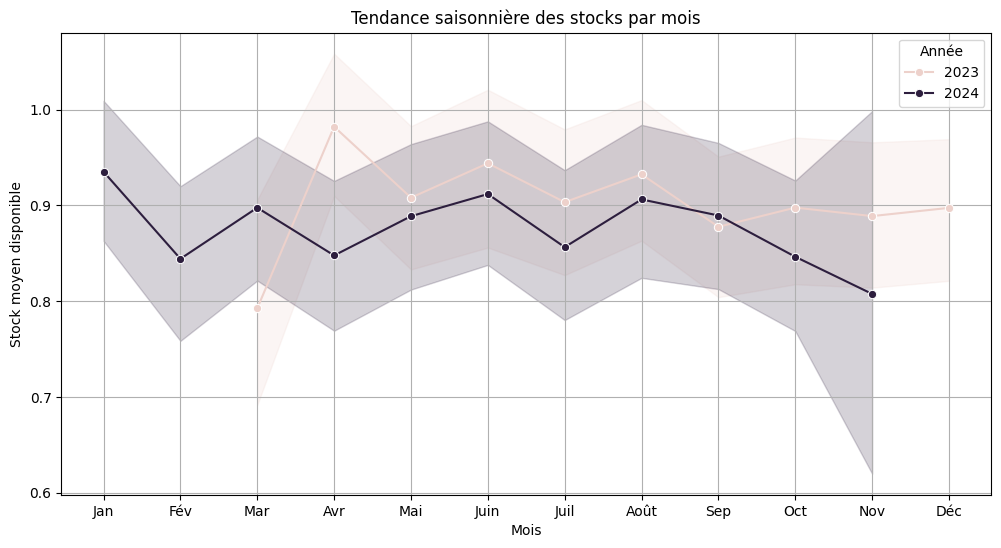

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=dfm_invent1_product, x='month', y='available_stock', hue='year', marker='o')

plt.title("Tendance saisonnière des stocks par mois")
plt.xlabel("Mois")
plt.ylabel("Stock moyen disponible")
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.legend(title="Année")
plt.grid(True)
plt.show()


# 🧑 Logistic

Delivery + orders

In [ ]:
df_orders.shape #5000 lignes
df_delivery.shape #5000 lignes
df_delivery.nunique() #5000 lignes
#KP = order id

order_id                 5000
delivery_partner_id      5000
promised_time            4999
actual_time              5000
delivery_time_minutes      36
distance_km               451
delivery_status             3
reasons_if_delayed          2
dtype: int64

In [ ]:
df_delivery.columns

Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')

In [ ]:
df_orders.nunique() #order total, payment method

order_id                  5000
customer_id               2172
order_date                5000
promised_delivery_time    4999
actual_delivery_time      5000
delivery_status              3
order_total               4550
payment_method               4
delivery_partner_id       5000
store_id                  5000
dtype: int64

In [ ]:
dfm_orders_delivery = df_orders.merge(df_delivery[['order_id', 'distance_km', 'delivery_status','delivery_time_minutes','reasons_if_delayed']],
                              on='order_id',
                              how='left',
                              suffixes=('', '_delivery'))


In [ ]:
dfm_orders_delivery.shape # 5000 orders id , 5000 lignes

(5000, 14)

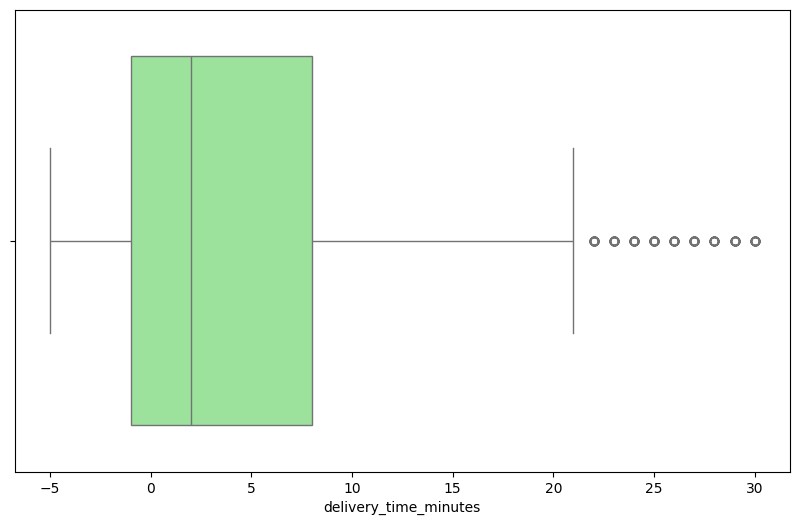

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=dfm_orders_delivery['delivery_time_minutes'], color='lightgreen')
plt.show()
#une grande dispersion des données entre temps promis et actual
#pourquoi ?
#delivery time minutes to check grande dispersion des données

In [ ]:
df_delivery.describe() #voir max delivery time #pas de date
df_delivery.nunique() #pas la peine de regarder le partner id

order_id                 5000
delivery_partner_id      5000
promised_time            4999
actual_time              5000
delivery_time_minutes      36
distance_km               451
delivery_status             3
reasons_if_delayed          2
dtype: int64

In [ ]:
# Vérifier si tous les order_id de df_delivery sont dans df_orders
common_order_ids = dfm_orders_delivery['order_id'].isin(df_orders['order_id'])

# Afficher les order_ids communs
common_order_ids_count = common_order_ids.sum()  # Nombre d'order_ids communs
print(f"Nombre d'order_id communs : {common_order_ids_count}")


Nombre d'order_id communs : 5000


In [ ]:
#rajouter le lieu ?

In [ ]:
dfm_orders_delivery.groupby('delivery_partner_id')['delivery_status'].value_counts() # aucun intéRet
dfm_orders_delivery.groupby('payment_method')['delivery_status'].value_counts() # aucun intéRet
dfm_orders_delivery.groupby('delivery_status')['distance_km'].mean() # aucun intéRet

delivery_status
On Time                  2.716441
Significantly Delayed    2.692515
Slightly Delayed         2.735564
Name: distance_km, dtype: float64

In [ ]:
dfm_orders_delivery.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'distance_km',
       'delivery_status_delivery', 'delivery_time_minutes',
       'reasons_if_delayed'],
      dtype='object')

## Delivery order items

In [ ]:
df_items.head() #pas vraiment d'intéret à les fusionner

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55

In [ ]:
df_items.shape
df_items.nunique() #5000 lignes 5000 orders id que 268 produits

order_id      5000
product_id     268
quantity         3
unit_price     267
dtype: int64

In [ ]:
#est ce que mes order id sont les meme dans mes 2 tables ?
set(dfm_orders_delivery['order_id']) == set(df_items['order_id'])
#true

True

In [ ]:
df_items.head() # j'ai product id, qty et unit price en plus

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42
2  9185164487      741341         2      923.84
3  9644738826      561860         1      874.78
4  5427684290      602241         2      976.55

In [ ]:
#délai de livraison par catégory produit ? par area ?

## Merge with customers info

In [ ]:
df_customers.shape #2500 customers id, 2500 lignes

(2500, 11)

In [ ]:
df_customers.head(2) #area #customer segment

customer_id  customer_name                   email         phone  \
0     97475543  Niharika Nagi  ektataneja@example.org  912987579691   
1     22077605   Megha Sachar    vedant45@example.com  915123179717   

                               address     area  pincode registration_date  \
0  23, Nayar Path, Bihar Sharif-154625    Udupi   321865        2023-05-13   
1  51/302, Buch Chowk\nSrinagar-570271  Aligarh   149394        2024-06-18   

  customer_segment  total_orders  avg_order_value  
0          Premium            13           451.92  
1         Inactive             4           825.48

In [ ]:
dfm_orders_delivery_customers = dfm_orders_delivery.merge(
    df_customers[['customer_id', 'area', 'customer_segment']],
    on='customer_id',
    how='left'
)


In [ ]:
dfm_orders_delivery_customers.shape #5000 lignes
dfm_orders_delivery_customers.nunique() #5000 orders id and 2172 customers

order_id                    5000
customer_id                 2172
order_date                  5000
promised_delivery_time      4999
actual_delivery_time        5000
delivery_status                3
order_total                 4550
payment_method                 4
delivery_partner_id         5000
store_id                    5000
distance_km                  451
delivery_status_delivery       3
delivery_time_minutes         36
reasons_if_delayed             2
area                         316
customer_segment               4
dtype: int64

In [ ]:
dfm_orders_delivery_customers.head() #per order id

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  distance_km delivery_status_delivery  \
0                63230      4771         0.96                  On Time   
1                14983      7534         0.98                  On Time   
2                39859      9886         3.83                  On Time   
3                61497      7917         2.76                  On Time   
4                84315      2741         2.63                  On Time   

   delivery_time_minutes reasons_if_delayed       area customer_segment  
0                   -5.0            Unknown  Allahabad          Regular  
1                    2.0            Traffic   Thrissur              New  
2                    4.0            Traffic    Vellore         Inactive  
3                   -1.0            Unknown       Gaya          Premium  
4                    1.0            Traffic    Asansol          Premium

In [ ]:
#relation entre délai de livraison et area (et pas distance km parcouru)
#quelle colonne ? extraire csv

In [ ]:
dfm_orders_delivery_customers.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'distance_km',
       'delivery_status_delivery', 'delivery_time_minutes',
       'reasons_if_delayed', 'area', 'customer_segment'],
      dtype='object')

In [ ]:
#voir si order id meme que orders et delivery
#voir si customer id meme que orders et delivery

In [ ]:
dfm_orders_delivery_customers.nunique() #5000 order id et 2172 customer id check 5000 order dates

order_id                    5000
customer_id                 2172
order_date                  5000
promised_delivery_time      4999
actual_delivery_time        5000
delivery_status                3
order_total                 4550
payment_method                 4
delivery_partner_id         5000
store_id                    5000
distance_km                  451
delivery_status_delivery       3
delivery_time_minutes         36
reasons_if_delayed             2
area                         316
customer_segment               4
dtype: int64

## Merge with customers feedback

In [ ]:
df_feedback.nunique() #5000 order id 2172 customers id 600 dates
# I only need order_id, customer_id, rating, sentiment, feedback_text, feedback_category

feedback_id          5000
order_id             5000
customer_id          2172
rating                  5
feedback_text          25
feedback_category       4
sentiment               3
feedback_date         600
df_feedback           600
dtype: int64

In [ ]:
#orders_id en commun
common_orders = set(dfm_orders_delivery_customers['order_id']).intersection(set(df_feedback['order_id']))
only_in_dfm_orders_delivery_customers = set(dfm_orders_delivery_customers['order_id']) - set(df_feedback['order_id'])
only_in_df_feedback = set(df_feedback['order_id']) - set(dfm_orders_delivery_customers['order_id'])

print("Order ID communs :", common_orders)
print("Order ID uniquement dans df1 :", only_in_dfm_orders_delivery_customers)
print("Order ID uniquement dans df2 :", only_in_df_feedback)

Order ID communs : {2390228992, 1236959246, 9487843345, 105578518, 3514859549, 2433646621, 32604190, 8214544415, 6518276143, 6704234561, 1105231941, 7682359398, 5517901926, 6657245289, 607125614, 6253838449, 101613683, 5793742966, 1821573240, 9931161723, 168067196, 89194627, 2536833157, 189431942, 1716322448, 9582674091, 7491420331, 361595059, 3793977529, 5816647866, 4540563647, 7453442245, 6239453389, 7846068436, 3429728472, 8707473624, 9972678893, 2580381935, 824869105, 8255275254, 4647158015, 5427462399, 8706556166, 3742662928, 2484470052, 4204069161, 7381549355, 5581013292, 2544173358, 4538204462, 7653097776, 4610687284, 4769055037, 5647827263, 6899859775, 9126871366, 2070610257, 4028432722, 515408216, 7017136473, 5868093790, 1091207520, 9056190831, 9457009010, 2734817654, 6652395897, 6373867899, 2577990012, 1377599881, 7357727116, 8963522960, 7148568995, 9430139302, 6143213997, 1736212920, 1271431612, 6932431317, 5770510806, 646676955, 2065203676, 1275232752, 707035635, 8328118787

In [ ]:
comparison = dfm_orders_delivery_customers.merge(df_feedback, on='order_id', suffixes=('_dfm', '_df_feedback'))
comparison.sample(2)
comparison.columns

Index(['order_id', 'customer_id_dfm', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'distance_km',
       'delivery_status_delivery', 'delivery_time_minutes',
       'reasons_if_delayed', 'area', 'customer_segment', 'feedback_id',
       'customer_id_df_feedback', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date', 'df_feedback'],
      dtype='object')

In [ ]:
date_diff = comparison[comparison['order_date'] != comparison['feedback_date']]
print("🚨 Différences de dates trouvées :")
print(date_diff[['order_id', 'order_date', 'feedback_date']])
# les dates des feedbacks ne peuvent etre gardées

🚨 Différences de dates trouvées :
        order_id           order_date feedback_date
0     1961864118  2024-07-17 08:34:01    2024-07-17
1     1549769649  2024-05-28 13:14:29    2024-05-28
2     9185164487  2024-09-23 13:07:12    2024-09-23
3     9644738826  2023-11-24 16:16:56    2023-11-24
4     5427684290  2023-11-20 05:00:39    2023-11-20
...          ...                  ...           ...
4995  1669690997  2023-12-25 15:46:20    2023-12-25
4996  8340761903  2023-11-27 09:18:43    2023-11-27
4997  5936301790  2024-06-21 19:09:09    2024-06-21
4998  5710579377  2024-06-06 14:58:13    2024-06-06
4999  2494813730  2023-08-23 12:04:18    2023-08-23

[5000 rows x 3 columns]


In [ ]:
common_customers = set(dfm_orders_delivery_customers['customer_id']).intersection(set(df_feedback['customer_id']))
only_in_dfm_orders_delivery_customers = set(dfm_orders_delivery_customers['customer_id']) - set(df_feedback['customer_id'])
only_in_df_feedback = set(df_feedback['customer_id']) - set(dfm_orders_delivery_customers['customer_id'])

print("Order ID communs :", common_customers)
print("Order ID uniquement dans df1 :", only_in_dfm_orders_delivery_customers)
print("Order ID uniquement dans df2 :", only_in_df_feedback)
#customers id identiques

Order ID communs : {44269569, 11493380, 39976965, 68419593, 83304462, 88866835, 75464725, 89784343, 52215833, 46563355, 63971358, 92356639, 97411107, 69034027, 91562028, 2875442, 10240052, 76202036, 43860025, 57770044, 57081917, 47939657, 1507408, 69632084, 95428692, 9650263, 90038364, 84066402, 50045027, 67952740, 25722990, 38133873, 58974323, 34381941, 83304571, 23961725, 27746432, 2457734, 99729547, 23380116, 37691544, 32293017, 73891999, 22077605, 99156138, 13492411, 44859592, 10608845, 25526479, 88252625, 6668498, 90144978, 79773912, 64151769, 10830043, 21577948, 31940833, 65618148, 31776996, 11387110, 93675757, 70230254, 73679086, 36675827, 16400639, 95912198, 96461062, 40419593, 62742797, 3096845, 45383958, 88965399, 11616535, 18465047, 69353754, 37904682, 83034412, 14991661, 59769142, 16785724, 84361534, 41640262, 24633671, 9314637, 25829710, 22036818, 23126356, 62816600, 74572121, 3588443, 42615134, 81584486, 84377964, 61522288, 32809328, 16376189, 38969732, 54837637, 10019218

In [ ]:
df_feedback.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date', 'df_feedback'],
      dtype='object')

In [ ]:
dfm_orders_delivery_customers_fdbk = dfm_orders_delivery_customers.merge(
    df_feedback[['order_id', 'customer_id', 'rating', 'feedback_text', 'feedback_category', 'sentiment']],
    on=['order_id', 'customer_id'],  # Fusion sur order_id ET customer_id
    how='left'  # On garde toutes les lignes de dfm_orders_delivery_customers
)


In [ ]:
dfm_orders_delivery_customers_fdbk.shape #5000 lignes
dfm_orders_delivery_customers_fdbk.nunique()# no change
dfm_orders_delivery_customers_fdbk.head()

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  distance_km delivery_status_delivery  \
0                63230      4771         0.96                  On Time   
1                14983      7534         0.98                  On Time   
2                39859      9886         3.83                  On Time   
3                61497      7917         2.76                  On Time   
4                84315      2741         2.63                  On Time   

   delivery_time_minutes reasons_if_delayed       area customer_segment  \
0                   -5.0            Unknown  Allahabad          Regular   
1                    2.0            Traffic   Thrissur              New   
2                    4.0            Traffic    Vellore         Inactive   
3                   -1.0            Unknown       Gaya          Premium   
4                    1.0            Traffic    Asansol          Premium   

   rating                         feedback_text feedback_category sentiment  
0       4         It was okay, nothing special.          Delivery   Neutral  
1       3              The order was incorrect.    App Experience  Negative  
2       3         It was okay, nothing special.    App Experience   Neutral  
3       4      The product met my expectations.    App Experience   Neutral  
4       3  Product was damaged during delivery.          Delivery  Negative

In [ ]:
duplicates = dfm_orders_delivery_customers_fdbk.duplicated(subset=['order_id', 'customer_id'], keep=False)
print(dfm_orders_delivery_customers_fdbk[duplicates])


Empty DataFrame
Columns: [order_id, customer_id, order_date, promised_delivery_time, actual_delivery_time, delivery_status, order_total, payment_method, delivery_partner_id, store_id, distance_km, delivery_status_delivery, delivery_time_minutes, reasons_if_delayed, area, customer_segment, rating, feedback_text, feedback_category, sentiment]
Index: []


In [ ]:
print(dfm_orders_delivery_customers_fdbk[['rating', 'feedback_text', 'feedback_category', 'sentiment']].isna().sum())


rating               0
feedback_text        0
feedback_category    0
sentiment            0
dtype: int64


In [ ]:
dfm_orders_delivery_customers_fdbk.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'distance_km',
       'delivery_status_delivery', 'delivery_time_minutes',
       'reasons_if_delayed', 'area', 'customer_segment', 'rating',
       'feedback_text', 'feedback_category', 'sentiment'],
      dtype='object')

# 💻 Extraction des 2 csv

In [ ]:
df_marketing.head()

campaign_id      campaign_name        date target_audience channel  \
0       548299  New User Discount  2024-11-05         Premium     App   
1       390914    Weekend Special  2024-11-05        Inactive     App   
2       834385     Festival Offer  2024-11-05        Inactive   Email   
3       241523         Flash Sale  2024-11-05        Inactive     SMS   
4       595111   Membership Drive  2024-11-05       New Users   Email   

   impressions  clicks  conversions    spend  revenue_generated  roas  
0         3130     163           78  1431.85            4777.75  3.60  
1         3925     494           45  4506.34            6238.11  2.98  
2         7012     370           78  4524.23            2621.00  2.95  
3         1115     579           86  3622.79            2955.00  2.84  
4         7172     795           54  2888.99            8951.81  2.22

In [ ]:
#dfm_orders_delivery_customers_fdbk
dfm_orders_delivery_customers_fdbk.to_csv('dfm_orders_delivery_customers_fdbk.csv',index=False)


In [ ]:
dfm_invent1_product.to_csv('dfm_invent1_product.csv',index=False)


In [ ]:
!pip install google-cloud-bigquery
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery
import pandas as pd

MessageError: Error: credential propagation was unsuccessful

In [ ]:
dfm_invent1_product.head(3)

In [ ]:
#Delivery on Big querry
project_id = "blinkit-454014"
dataset_id = "blinkitcleaned"
table_id = "deliveries"
table_full_id = f"{project_id}.{dataset_id}.{table_id}"

df1 = pd.read_csv("dfm_orders_delivery_customers_fdbk.csv")

#df1.to_gbq(destination_table=table_full_id, project_id=project_id, if_exists="replace")


In [ ]:
#Stock on Big querry
project_id = "blinkit-454014"
dataset_id = "blinkitcleaned"
table_id = "stock"
table_full_id = f"{project_id}.{dataset_id}.{table_id}"

df1 = pd.read_csv("dfm_invent1_product.csv")

#df1.to_gbq(destination_table=table_full_id, project_id=project_id, if_exists="replace")


In [ ]:
dfm_orders_delivery_customers.columns

In [ ]:
dfm_orders_delivery_customers[['actual_delivery_time','order_date']]

In [ ]:
dfm_orders_delivery_customers['area'].value_counts()
#316 areas
#customers per area
dfm_orders_delivery_customers['area'].unique()


In [ ]:
dfm_orders_delivery_customers.columns

In [ ]:
customer_count_per_area = dfm_orders_delivery_customers["area"].value_counts()
df_temp = dfm_orders_delivery_customers.groupby("area")["delivery_time_minutes"].mean().reset_index()
df_temp["customer_id"] = df_temp["area"].map(customer_count_per_area)

sns.scatterplot(x=df_temp["customer_id"], y=df_temp["delivery_time_minutes"])
plt.xlabel("Nombre de clients par zone")
plt.ylabel("Temps de livraison moyen (min)")
plt.show()



In [ ]:
dfm_orders_delivery_customers.nlargest(10, "delivery_time_minutes")


In [ ]:
dfm_orders_delivery_customers.groupby("area")["delivery_time_minutes"].mean().sort_values(ascending=False)
#grandes villes
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=dfm_orders_delivery_customers["distance_km"], y=dfm_orders_delivery_customers["delivery_time_minutes"])
plt.show()


In [ ]:
sns.boxplot(x=dfm_orders_delivery_customers["customer_segment"], y=dfm_orders_delivery_customers["delivery_time_minutes"])
plt.show()


In [ ]:
dfm_orders_delivery_customers.groupby("order_date")["delivery_time_minutes"].mean().plot(kind="line")
plt.show()


In [ ]:
sns.boxplot(y=dfm_orders_delivery_customers["delivery_time_minutes"])
plt.show()


# 🤸 Tests statistiques

Damaged stock

In [ ]:
dfm_invent1_product.columns

In [ ]:
from scipy.stats import pearsonr

# Corrélation entre damaged_stock et max_stock_level
corr1, p_value1 = pearsonr(dfm_invent1_product['damaged_stock'], dfm_invent1_product['stock_received'])
print(f"Corrélation Damaged Stock - stock_received: {corr1}, p-value: {p_value1}")

# Corrélation entre damaged_stock et stock_turnover_rate
corr2, p_value2 = pearsonr(dfm_invent1_product['damaged_stock'], dfm_invent1_product['shelf_life_days'])
print(f"Corrélation Damaged Stock - shelf_life_days: {corr2}, p-value: {p_value2}")

#no corrélation btw damaged stock and max stock level and average stock ni avec le type de produit ni shelf life days

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot avec régression entre damaged_stock et max_stock_level
sns.lmplot(x='stock_received', y='damaged_stock', data=dfm_invent1_product)
plt.title('Corrélation entre Damaged Stock et stock_received')
plt.show()

#lorsque stock receive augmente alors damage stock diminue

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour damaged_stock
plt.figure(figsize=(15, 10))
sns.boxplot(x=dfm_invent1_product['damaged_stock'])
plt.title("Boxplot de Damaged Stock")
plt.show()

# Boxplot pour stock_received
plt.figure(figsize=(10, 5))
sns.boxplot(x=dfm_invent1_product['stock_received'])
plt.title("Boxplot de Stock Received")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dfm_invent1_product['stock_received'], y=dfm_invent1_product['damaged_stock'])
plt.title("Relation entre Stock Received et Damaged Stock (avec outliers)")
plt.xlabel("Stock Received")
plt.ylabel("Damaged Stock")
plt.show()


In [ ]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile (25%)
    Q3 = df[column].quantile(0.75)  # Troisième quartile (75%)
    IQR = Q3 - Q1  # Intervalle interquartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_damaged_stock = detect_outliers_iqr(dfm_invent1_product, 'damaged_stock')
outliers_stock_received = detect_outliers_iqr(dfm_invent1_product, 'stock_received')

print(f"Outliers dans Damaged Stock : {outliers_damaged_stock.shape[0]} lignes")
print(f"Outliers dans Stock Received : {outliers_stock_received.shape[0]} lignes")

# Afficher les valeurs aberrantes
outliers_damaged_stock


In [ ]:
# Filtrer les données sans outliers
df_filtered = dfm_invent1_product[~dfm_invent1_product.index.isin(outliers_damaged_stock.index)]
df_filtered = df_filtered[~df_filtered.index.isin(outliers_stock_received.index)]

# Recalculer la corrélation
from scipy.stats import pearsonr

corr_filtered, p_value_filtered = pearsonr(df_filtered['damaged_stock'], df_filtered['stock_received'])
print(f"Nouvelle corrélation après suppression des outliers : {corr_filtered}, p-value : {p_value_filtered}")


In [ ]:
plt.figure(figsize=(12, 6))
top_damaged_products = dfm_invent1_product.groupby('product_name')['damaged_stock'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_damaged_products.values, y=top_damaged_products.index, palette="Reds_r")
plt.xlabel("Nombre total de stocks endommagés")
plt.ylabel("Produits")
plt.title("Top 10 des produits les plus endommagés")
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
top_damaged_categories = dfm_invent1_product.groupby('category')['damaged_stock'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_damaged_categories.values, y=top_damaged_categories.index, palette="Oranges_r")
plt.xlabel("Nombre total de stocks endommagés")
plt.ylabel("Catégories")
plt.title("Top 10 des catégories avec le plus de stocks endommagés")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'une table croisée des produits et catégories avec la somme des stocks endommagés
pivot_table = dfm_invent1_product.pivot_table(index='product_name', columns='category', values='damaged_stock', aggfunc='sum')

# Sélectionner les produits et catégories les plus touchés (top 10)
top_products = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
top_categories = pivot_table.sum(axis=0).sort_values(ascending=False).head(10).index

# Filtrer la table pour ne garder que les plus impactés
pivot_table_filtered = pivot_table.loc[top_products, top_categories]

# Création de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_filtered, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Heatmap des stocks endommagés par produit et catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Produit")
plt.show()


Deliveries

In [ ]:
dfm_orders_delivery_customers_fdbk.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='reasons_if_delayed', y='delivery_time_minutes', data=dfm_orders_delivery_customers_fdbk)
plt.xticks(rotation=45)
plt.title("Impact des raisons de retard sur le temps de livraison")
plt.show()


In [ ]:
from scipy.stats import pearsonr

corr1, p_value1 = pearsonr(dfm_orders_delivery_customers_fdbk['delivery_time_minutes'], dfm_orders_delivery_customers_fdbk['distance_km'])
print(f"Corrélation delivery_time_minutes - stock_received: {corr1}, p-value: {p_value1}")

corr2, p_value2 = pearsonr(dfm_orders_delivery_customers_fdbk['delivery_time_minutes'], dfm_orders_delivery_customers_fdbk['customer_id'])
print(f"Corrélation delivery_time_minutes - shelf_life_days: {corr2}, p-value: {p_value2}")

#no corrélation btw delivery time minutes and distance km, rating, total order, customer id

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Extraire l'heure de la colonne 'order_date'
dfm_orders_delivery_customers_fdbk['delivery_hour'] = pd.to_datetime(dfm_orders_delivery_customers_fdbk['order_date']).dt.hour

# Filtrer les données pour séparer les statuts 'Traffic' et 'Unknown'
df_traffic = dfm_orders_delivery_customers_fdbk[dfm_orders_delivery_customers_fdbk['delivery_status'] == 'Traffic']
df_unknown = dfm_orders_delivery_customers_fdbk[dfm_orders_delivery_customers_fdbk['delivery_status'] == 'Unknown']

# Boxplot pour visualiser l'impact de l'heure de livraison sur le temps de livraison, selon le statut
plt.figure(figsize=(14, 7))
sns.boxplot(x='delivery_hour', y='delivery_time_minutes', data=dfm_orders_delivery_customers_fdbk, hue='delivery_status')
plt.title("Impact de l'Heure de Livraison sur le Temps de Livraison (par Statut)")
plt.xlabel("Heure de Livraison")
plt.ylabel("Temps de Livraison (minutes)")
plt.xticks(rotation=45)
plt.show()

# Calculer la corrélation de Pearson entre l'heure de livraison et le temps de livraison
corr_traffic, p_value_traffic = pearsonr(df_traffic['delivery_hour'], df_traffic['delivery_time_minutes'])
corr_unknown, p_value_unknown = pearsonr(df_unknown['delivery_hour'], df_unknown['delivery_time_minutes'])

print(f"Corrélation (Traffic) : {corr_traffic}, p-value: {p_value_traffic}")
print(f"Corrélation (Unknown) : {corr_unknown}, p-value: {p_value_unknown}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir un seuil de retard (par exemple, 30 minutes)
delay_threshold = 20

# Filtrer les commandes avec un temps de livraison supérieur au seuil
significantly_delayed_orders = dfm_orders_delivery_customers_fdbk[dfm_orders_delivery_customers_fdbk['delivery_time_minutes'] > delay_threshold]

# Extraire l'heure de livraison
significantly_delayed_orders['delivery_hour'] = pd.to_datetime(significantly_delayed_orders['order_date']).dt.hour

# Visualiser la répartition des retards par heure (en utilisant un histogramme)
plt.figure(figsize=(12, 6))
sns.histplot(significantly_delayed_orders['delivery_hour'], kde=True, bins=24, color='purple')
plt.title("Répartition des Commandes Significativement Retardées par Heure de Livraison")
plt.xlabel("Heure de Livraison")
plt.ylabel("Nombre de Commandes Retardées")
plt.xticks(range(0, 24))
plt.show()

# Visualiser la distribution des retards par zone géographique (par exemple) avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_hour', y='delivery_time_minutes', data=significantly_delayed_orders)
plt.title("Distribution des Retards Significatifs par Heure de Livraison")
plt.xlabel("Heure de Livraison")
plt.ylabel("Temps de Livraison (minutes)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_inventory1.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')

In [ ]:
dfm_invent1_product.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock', 'product_name',
       'category', 'brand', 'price', 'mrp', 'margin_percentage',
       'shelf_life_days', 'min_stock_level', 'max_stock_level',
       'damaged_percentage', 'available_stock', 'average_stock_per_product',
       'stock_turnover_rate', 'pourcentage_mrp_price',
       'gross_margin_per_product', 'stock_rate', 'year', 'month', 'week',
       'day'],
      dtype='object')

In [ ]:
dfm_invent1_product['date'].min() #17.03.2023
dfm_invent1_product['date'].max() #11.05.2024

Timestamp('2024-11-05 00:00:00')

In [ ]:
df_marketing.columns
df_marketing['date'].min() #17.03.2023
df_marketing['date'].max() #11.05.2024

'2024-11-05'